# Investigating the Data

In [1]:
%load_ext autoreload
%autoreload 2
from plot_fuse_results import (plot_results, plot_results2, get_merged_table, get_bohlin78)
from matplotlib import pyplot
pyplot.ioff()

# Get the data

### data for Gordon09 extinction curve sightlines

In [2]:
data = get_merged_table()

### data for Gordon09 comparision star sightlines

In [3]:
data_comp = get_merged_table(comp=True)

### data for Bohlin 78 Copernicus sightlines

In [4]:
data_bohlin78 = get_bohlin78()

# Gas-to-A(V)

Model: Linear1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
            slope                intercept      
    ---------------------- ---------------------
    1.6257547137289856e+21 6.146027690388313e+20


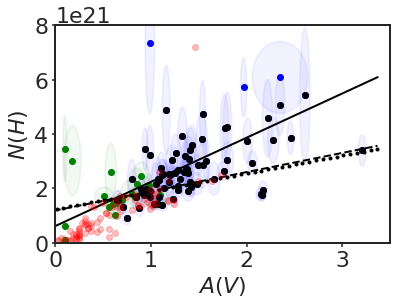

In [5]:
plot_results(data, 'AV', 'nhtot', pxrange=[0.0,3.5], pyrange=[0.0,0.8e22],
            data_comp=data_comp, data_bohlin=data_bohlin78)

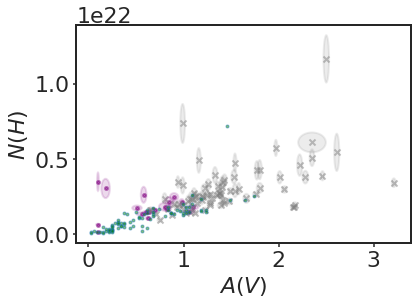

In [6]:
plot_results2(data, 'AV', 'nhtot', pxrange=[0.0,3.5], pyrange=[0.0,0.8e22],
            data_comp=data_comp, data_bohlin=data_bohlin78)

# Gas-to-E(B-V)

Model: Linear1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
            slope                intercept       
    --------------------- -----------------------
    7.060869154590919e+21 -1.0577794598444573e+20


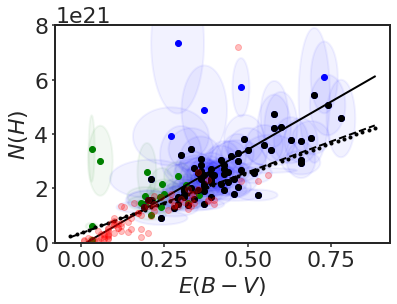

In [7]:
plot_results(data, 'EBV', 'nhtot', pyrange=[0.0,0.8e22],
            data_comp=data_comp, data_bohlin=data_bohlin78)

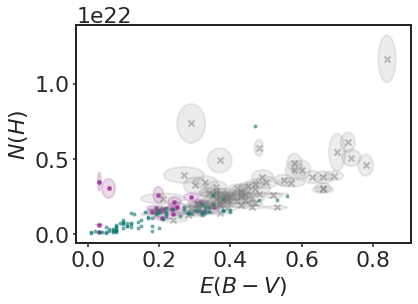

In [8]:
plot_results2(data, 'EBV', 'nhtot', pyrange=[0.0,0.8e22],
            data_comp=data_comp, data_bohlin=data_bohlin78)

## Gas-to-A(V) versus dust column

Model: Linear1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
             slope                intercept       
    ----------------------- ----------------------
    -2.6705678298207863e+20 2.4870805756447404e+21


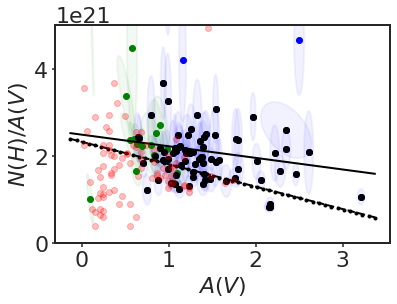

In [9]:
plot_results(data, 'AV', 'NH_AV', pyrange=[0.0,0.5e22],
            data_comp=data_comp,data_bohlin=data_bohlin78)

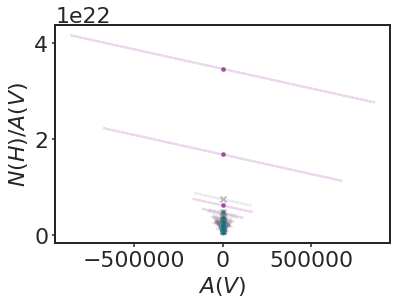

In [10]:
plot_results2(data, 'AV', 'NH_AV', pyrange=[0.0,0.5e22],
            data_comp=data_comp,data_bohlin=data_bohlin78)

## Gas-to-E(B-V) versus dust column

Model: Linear1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
           slope               intercept      
    -------------------- ---------------------
    -1.7299403491409e+21 7.640567650338111e+21


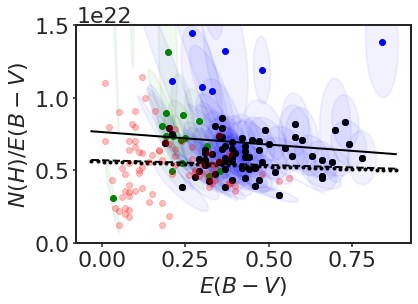

In [11]:
plot_results(data, 'EBV', 'NH_EBV', pyrange=[0.0,1.5e22],
            data_comp=data_comp,data_bohlin=data_bohlin78)

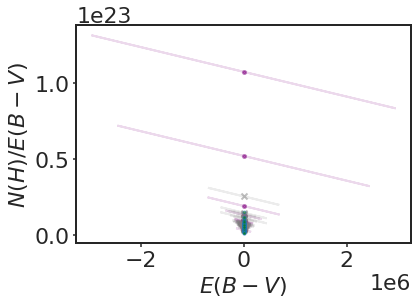

In [12]:
plot_results2(data, 'EBV', 'NH_EBV', pyrange=[0.0,1.5e22],
            data_comp=data_comp,data_bohlin=data_bohlin78)

# Gas-to-A(V) versus average grain size

Model: Linear1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
            slope                intercept      
    ---------------------- ---------------------
    -3.600261553381245e+20 3.305779561462606e+21


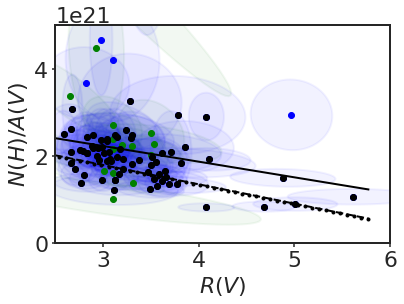

In [13]:
plot_results(data, 'RV', 'NH_AV', pxrange=[2.5,6.0], pyrange=[0.0,0.5e22],
            data_comp=data_comp)

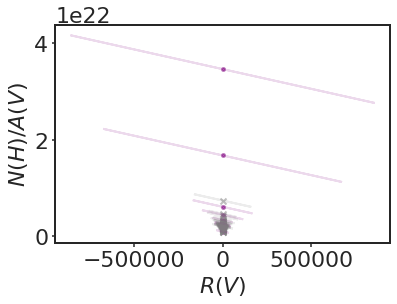

In [14]:
plot_results2(data, 'RV', 'NH_AV', pxrange=[2.5,6.0], pyrange=[0.0,0.5e22],
            data_comp=data_comp)

# Gas-to-A(V) versus molecular fraction

Model: Linear1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
            slope               intercept       
    --------------------- ----------------------
    -8.95009500227273e+20 2.3300684786191048e+21


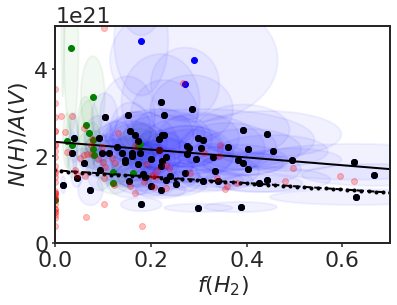

In [15]:
plot_results(data, 'fh2', 'NH_AV', pxrange=[0.0,0.7], pyrange=[0.0,0.5e22],
            data_comp=data_comp, data_bohlin=data_bohlin78)

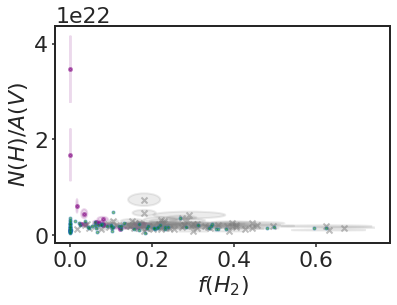

In [16]:
plot_results2(data, 'fh2', 'NH_AV', pxrange=[0.0,0.7], pyrange=[0.0,0.5e22],
            data_comp=data_comp, data_bohlin=data_bohlin78)

# Gas-to-E(B-V) versus molecular fraction

Model: Linear1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
             slope                intercept      
    ----------------------- ---------------------
    -3.8416651037289134e+21 7.856440844208521e+21


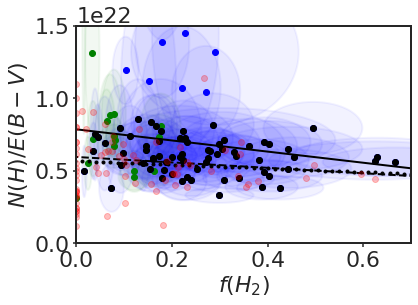

In [17]:
plot_results(data, 'fh2', 'NH_EBV', pxrange=[0.0,0.7], pyrange=[0.0,1.5e22],
            data_comp=data_comp, data_bohlin=data_bohlin78)

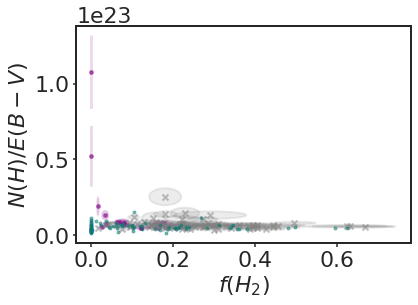

In [18]:
plot_results2(data, 'fh2', 'NH_EBV', pxrange=[0.0,0.7], pyrange=[0.0,1.5e22],
            data_comp=data_comp, data_bohlin=data_bohlin78)

# molecular fraction versus E(B-V) dust column

Model: Linear1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
           slope             intercept     
    ------------------- -------------------
    0.41549437493926134 0.07117262949370155


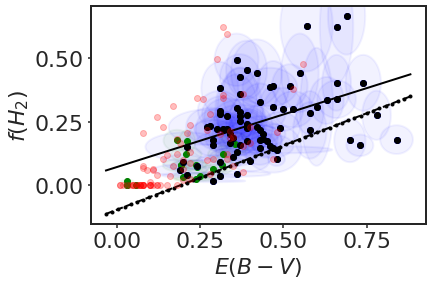

In [19]:
plot_results(data, 'EBV', 'fh2',
            data_comp=data_comp, data_bohlin=data_bohlin78)

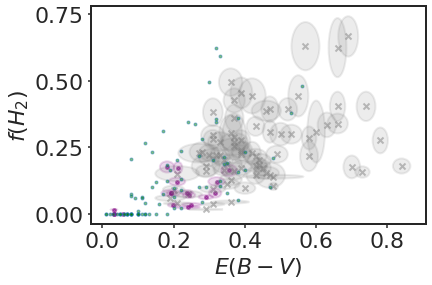

In [20]:
plot_results2(data, 'EBV', 'fh2',
            data_comp=data_comp, data_bohlin=data_bohlin78)

# molecular fraction versus A(V) dust column

Model: Linear1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
          slope             intercept     
    ------------------ -------------------
    0.1096855544934431 0.09357828273171527


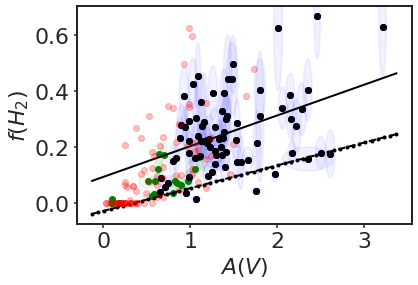

In [21]:
plot_results(data, 'AV', 'fh2',
            data_comp=data_comp, data_bohlin=data_bohlin78)

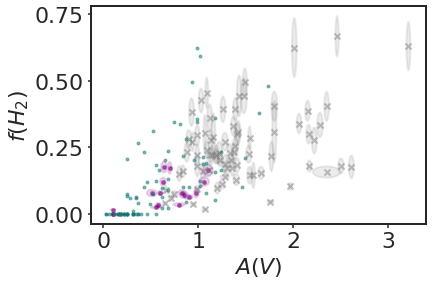

In [22]:
plot_results2(data, 'AV', 'fh2',
            data_comp=data_comp, data_bohlin=data_bohlin78)

# molecular fraction versus average grain size

Model: Linear1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
            slope              intercept     
    --------------------- -------------------
    -0.005580544483867685 0.26853740714742347


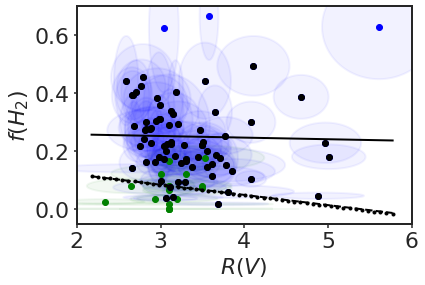

In [23]:
plot_results(data, 'RV', 'fh2', pxrange=[2.0,6.0],
            data_comp=data_comp)

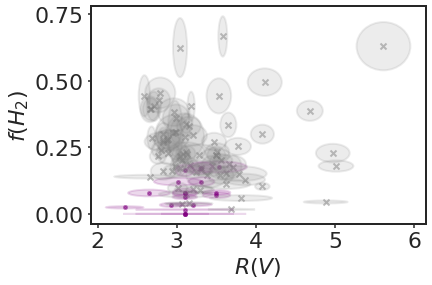

In [24]:
plot_results2(data, 'RV', 'fh2', pxrange=[2.0,6.0],
            data_comp=data_comp)

longitude versus rv and distance versus rv (and versus fh2)

COS FUV needs 2x10-13 ergs/blah blah

E140H for CO (maybe E140M), S/N 15...

E(B-V)/distance versus fH2.  Should also do A(V)/d.  Maybe n(H) as well.

Model: Linear1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
           slope            intercept     
    ------------------- ------------------
    -0.4633824958454221 3.5308447085457573


/Users/dvandeputte/Projects/FUSE H2/plotting_git/plot_fuse_results.py:473: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


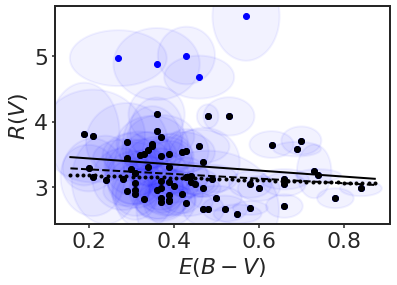

In [25]:
plot_results(data, 'EBV', 'RV')

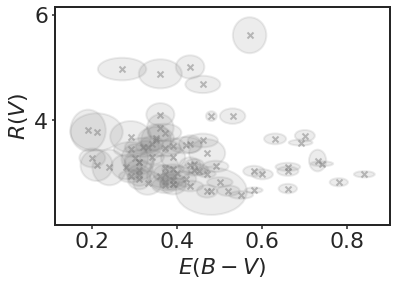

In [26]:
plot_results2(data, 'EBV', 'RV')

Model: Linear1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
          slope            intercept     
    ------------------ ------------------
    0.4663356758664183 2.6666585271515006


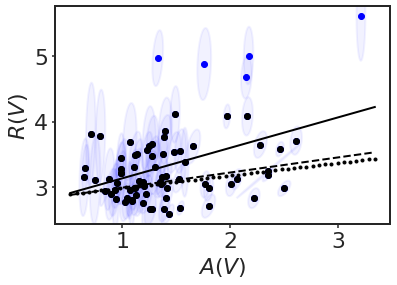

In [27]:
plot_results(data, 'AV', 'RV')

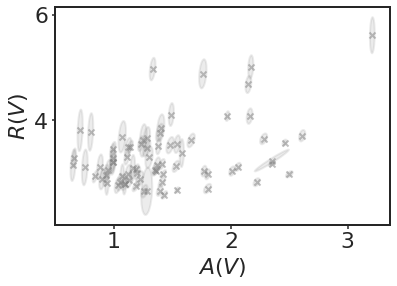

In [28]:
plot_results2(data, 'AV', 'RV')